In [1]:
#import libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Uber_Project\UberDataset.csv")

In [4]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


#### Basic Functions

In [5]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [7]:
df.size

8092

In [8]:
df.shape

(1156, 7)

In [9]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [10]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [11]:
df.describe(include='object')

,START_DATE,END_DATE,CATEGORY,START,STOP,PURPOSE
count,1156,1155,1155,1155,1155,653
unique,1155,1154,2,177,188,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,Meeting
freq,2,2,1078,201,203,187


In [12]:
#check null values

In [13]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [14]:
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

#### ckecking duplicate values

In [15]:
df.duplicated().sum()

1

#### drop duplicate values

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
# check data size after removing duplicate valeus
df.shape

(1155, 7)

#### Solve the missing value problem of Purpose column

In [18]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [19]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [20]:
df['PURPOSE'].isnull().sum()

0

#### Convert Satrt_Date ,end_Date datatype into date and time

In [21]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [22]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')

In [23]:
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

#### Seprate date,time,month and year from the start_date and end_date columns

In [24]:
df['start_date']=df['START_DATE'].dt.date
df['start_time']=df['START_DATE'].dt.time
df['end_date']=df['END_DATE'].dt.date
df['end_time']=df['END_DATE'].dt.time
df['month']=df['START_DATE'].dt.month
df['year']=df['START_DATE'].dt.year

In [25]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_time,end_date,end_time,month,year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1.0,2016.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02,01:25:00,2016-01-02,01:37:00,1.0,2016.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,1.0,2016.0


#### remove unwanted columns

In [27]:
df.drop(['START_DATE','END_DATE'],axis=1,inplace=True)

In [28]:
df.head(1)

,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_time,end_date,end_time,month,year
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1.0,2016.0


In [29]:
df.isnull().sum()

CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
start_date    1
start_time    1
end_date      1
end_time      1
month         1
year          1
dtype: int64

#### remove null value and chande datat type of month and year

In [31]:
df['month']=df['month'].fillna(df['month'].mode()[0])
df['month']=df['month'].astype('int')

In [32]:
df['month'].dtype

dtype('int32')

In [33]:
df['year']=df['year'].fillna(df['year'].mode()[0])
df['year']=df['year'].astype('int')

In [34]:
df['year'].dtype

dtype('int32')

In [35]:
df.dtypes

CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
start_date     object
start_time     object
end_date       object
end_time       object
month           int32
year            int32
dtype: object

#### convert start_time and end_time to hours and minutes

In [37]:
df['start_hour']=df['start_time'].apply(lambda x:x.hour)
df['start_minute']=df['start_time'].apply(lambda x:x.minute)
df['end_hour']=df['end_time'].apply(lambda x:x.hour)
df['end_minute']=df['end_time'].apply(lambda x:x.minute)



In [38]:
df.head(1)

,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_time,end_date,end_time,month,year,start_hour,start_minute,end_hour,end_minute
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016,21.0,11.0,21.0,17.0


#### Rearange the columns according to requirement

In [39]:
df=df[['start_date','start_hour','start_minute','end_date','end_hour','end_minute','month','year','CATEGORY','MILES','PURPOSE','START','STOP']]

In [40]:
df.head(2)

,start_date,start_hour,start_minute,end_date,end_hour,end_minute,month,year,CATEGORY,MILES,PURPOSE,START,STOP
0,2016-01-01,21.0,11.0,2016-01-01,21.0,17.0,1,2016,Business,5.1,Meal/Entertain,Fort Pierce,Fort Pierce
1,2016-01-02,1.0,25.0,2016-01-02,1.0,37.0,1,2016,Business,5.0,Meal/Entertain,Fort Pierce,Fort Pierce


#### create new column for duration of the trip to be in minutes

In [44]:
df['duration']=df['end_hour']*60+df['end_minute']-(df['start_hour']*60+df['start_minute'])

In [45]:
df.head(2)

,start_date,start_hour,start_minute,end_date,end_hour,end_minute,month,year,CATEGORY,MILES,PURPOSE,START,STOP,duration
0,2016-01-01,21.0,11.0,2016-01-01,21.0,17.0,1,2016,Business,5.1,Meal/Entertain,Fort Pierce,Fort Pierce,6.0
1,2016-01-02,1.0,25.0,2016-01-02,1.0,37.0,1,2016,Business,5.0,Meal/Entertain,Fort Pierce,Fort Pierce,12.0


###### convert miles to km

In [46]:
df['MILES']=df['MILES']*1.60934
#calculate speed
df['speed']=df['MILES']/(df['duration']/60)

In [47]:
df.head(2)

,start_date,start_hour,start_minute,end_date,end_hour,end_minute,month,year,CATEGORY,MILES,PURPOSE,START,STOP,duration,speed
0,2016-01-01,21.0,11.0,2016-01-01,21.0,17.0,1,2016,Business,8.207634,Meal/Entertain,Fort Pierce,Fort Pierce,6.0,82.07634
1,2016-01-02,1.0,25.0,2016-01-02,1.0,37.0,1,2016,Business,8.046700,Meal/Entertain,Fort Pierce,Fort Pierce,12.0,40.23350


In [48]:
df.speed.min()

-17.10798391304348

#### visulaize the data

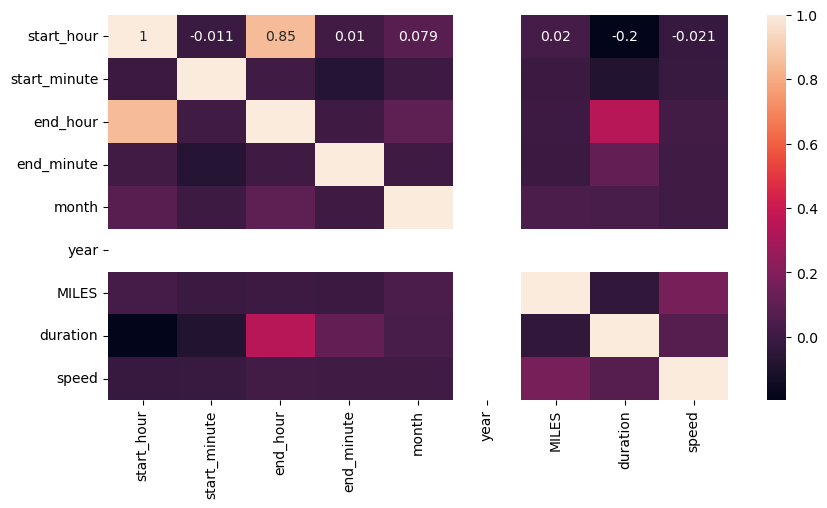

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Text(0.5, 1.0, 'Distribution of data over the month')

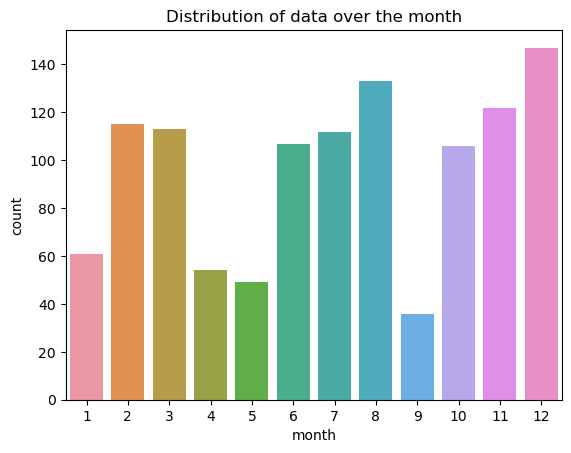

In [52]:
sns.countplot(x='month',data=df)
plt.title('Distribution of data over the month')

##### count the occurances of each categroy

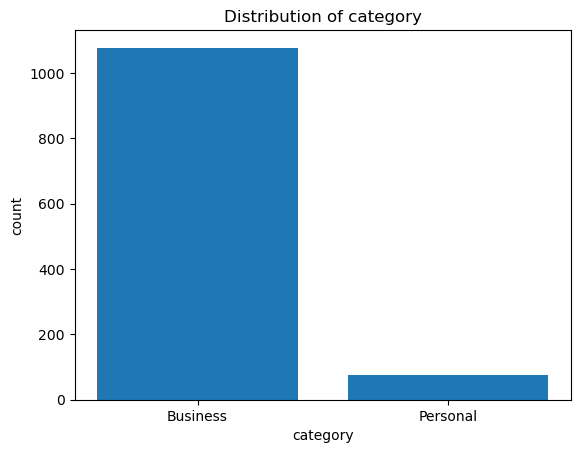

In [56]:
category_count=df['CATEGORY'].value_counts()
plt.bar(category_count.index,category_count.values)
plt.xlabel('category')
plt.ylabel('count')
plt.title('Distribution of category')
plt.show()

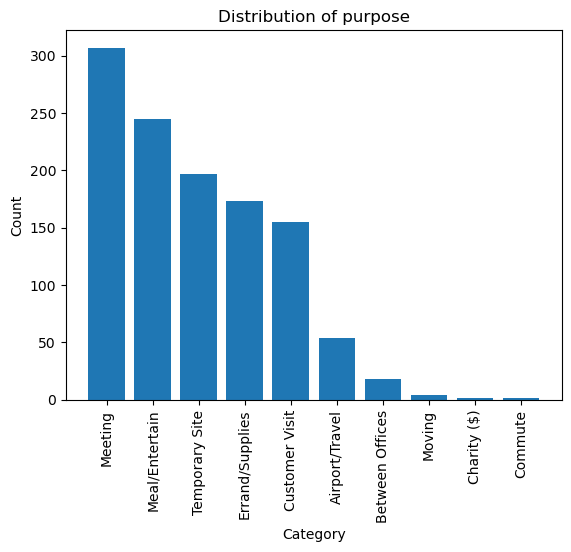

In [62]:
purpose_count=df['PURPOSE'].value_counts()
plt.bar(purpose_count.index,purpose_count.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of purpose')
plt.xticks(rotation=90)
plt.show()

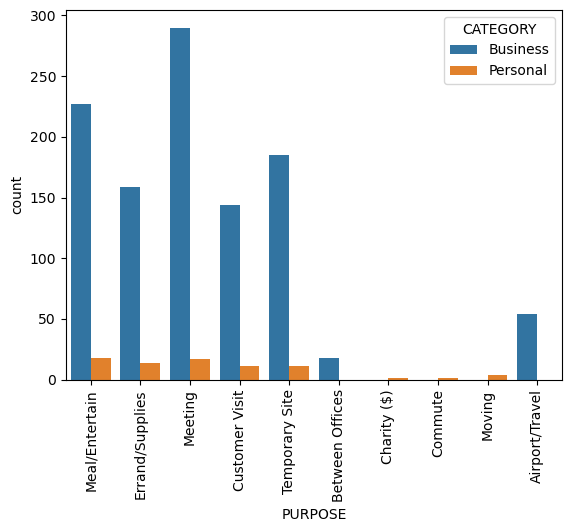

In [64]:
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()